<Axes: xlabel='x', ylabel='y'>

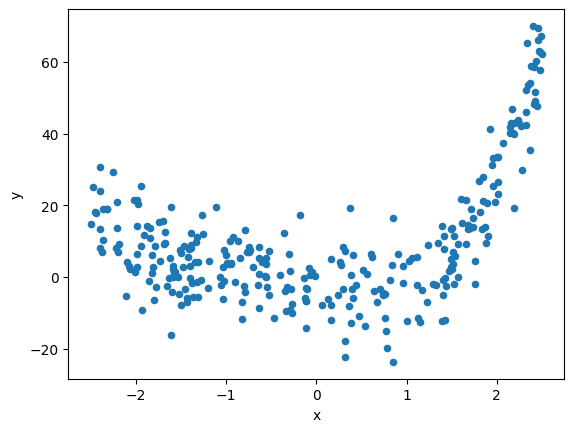

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.neighbors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pickle
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [2]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 1) (240, 1)
(60, 1) (60, 1)


intercept_: [10.38094184], coefficient_: [[5.35035031]]
train_mse: 267.3603567751864
test_mse: 252.9378662624796


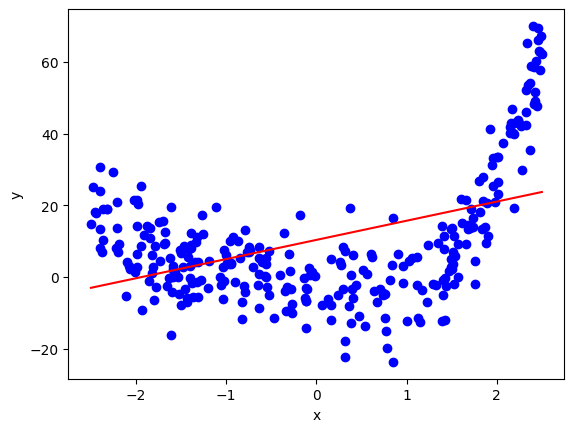

In [3]:
# Regresja liniowa

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
train_mse_lin_reg = mean_squared_error(y_train, y_pred_train)
test_mse_lin_reg = mean_squared_error(y_test, y_pred_test)

print(f'intercept_: {lin_reg.intercept_}, coefficient_: {lin_reg.coef_}')
print(f'train_mse: {train_mse_lin_reg}')
print(f'test_mse: {test_mse_lin_reg}')

plt.clf()
plt.scatter(X, y, c="blue")
X_new1 = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(X_new1, lin_reg.predict(X_new1), c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

train_mse: 41.01450139760448
test_mse: 80.55320245393615
knn.png


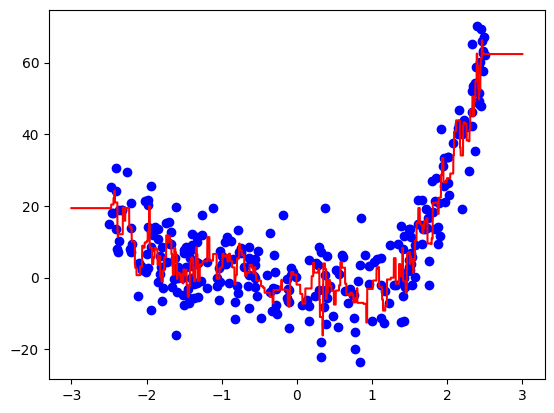

In [4]:
# KNN = 3
k = 3

knn_3_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
knn_3_reg.fit(X_train, y_train)

y_pred_train = knn_3_reg.predict(X_train)
y_pred_test = knn_3_reg.predict(X_test)
train_mse_knn_3 = mean_squared_error(y_train, y_pred_train)
test_mse_knn_3 = mean_squared_error(y_test, y_pred_test)

print(f'train_mse: {train_mse_knn_3}')
print(f'test_mse: {test_mse_knn_3}')

plt.clf()
plt.scatter(X, y, c="blue")
X_new1 = np.arange(-3, 3, 0.001).reshape(-1,1)
plt.plot(X_new1, knn_3_reg.predict(X_new1), c="red")
f = "knn.png"
plt.savefig(f)
print(f)

train_mse: 48.7804885423304
test_mse: 80.6301142293822
knn.png


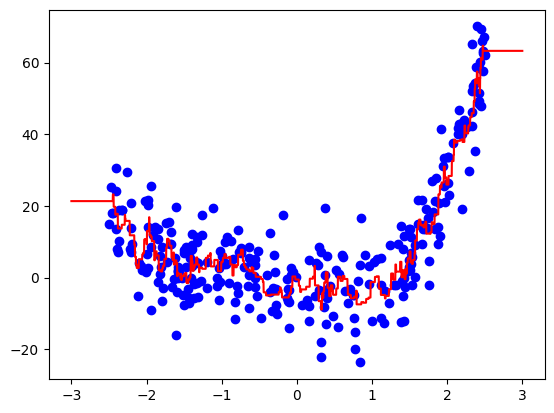

In [5]:
# KNN = 5
k = 5

knn_5_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
knn_5_reg.fit(X_train, y_train)

y_pred_train = knn_5_reg.predict(X_train)
y_pred_test = knn_5_reg.predict(X_test)
train_mse_knn_5 = mean_squared_error(y_train, y_pred_train)
test_mse_knn_5 = mean_squared_error(y_test, y_pred_test)

print(f'train_mse: {train_mse_knn_5}')
print(f'test_mse: {test_mse_knn_5}')

plt.clf()
plt.scatter(X, y, c="blue")
X_new1 = np.arange(-3, 3, 0.001).reshape(-1,1)
plt.plot(X_new1, knn_5_reg.predict(X_new1), c="red")
f = "knn.png"
plt.savefig(f)
print(f)

intercept_: [-6.42751779], coefficient_: [[4.41863225 6.85764209]]
train_mse: 99.07122594540985
test_mse: 114.57674842493472


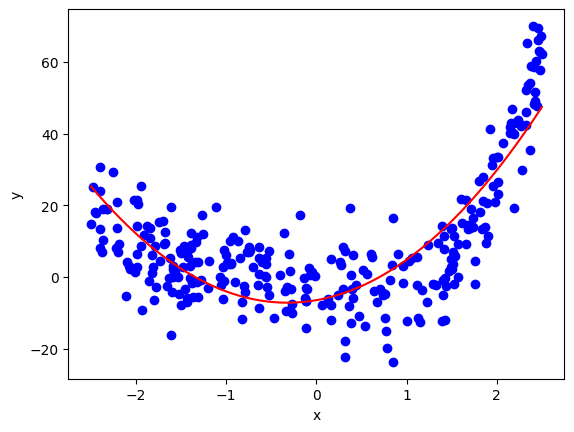

In [6]:
# Wielomianowa 2 stopnia
n = 2

poly_feature_2 = PolynomialFeatures(degree=n, include_bias=False)
X_poly_train = poly_feature_2.fit_transform(X_train)
X_poly_test = poly_feature_2.transform(X_test)
poly_2_reg = LinearRegression()
poly_2_reg.fit(X_poly_train, y_train)

y_pred_train = poly_2_reg.predict(X_poly_train)
y_pred_test = poly_2_reg.predict(X_poly_test)
train_mse_poly_2 = mean_squared_error(y_train, y_pred_train)
test_mse_poly_2 = mean_squared_error(y_test, y_pred_test)


print(f'intercept_: {poly_2_reg.intercept_}, coefficient_: {poly_2_reg.coef_}')
print(f'train_mse: {train_mse_poly_2}')
print(f'test_mse: {test_mse_poly_2}')

plt.clf()
plt.scatter(X, y, c="blue")
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_feature_2.transform(X_curve)
plt.plot(X_curve, poly_2_reg.predict(X_curve_poly), c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

intercept_: [-6.34705099], coefficient_: [[-4.21176528  6.50641135  2.2077407 ]]
train_mse: 68.32488078132093
test_mse: 81.08946567367775


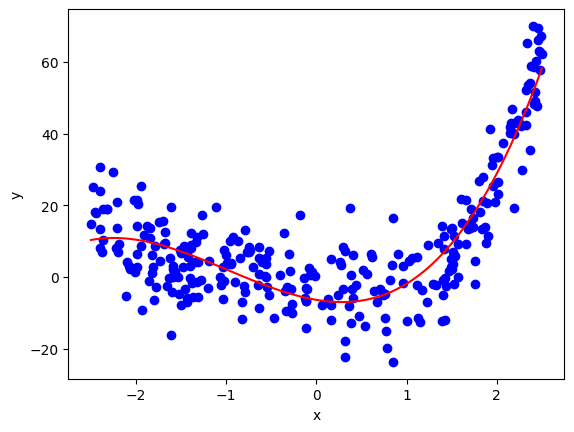

In [7]:
# Wielomianowa 2 stopnia
n = 3

poly_feature_3 = PolynomialFeatures(degree=n, include_bias=False)
X_poly_train = poly_feature_3.fit_transform(X_train)
X_poly_test = poly_feature_3.transform(X_test)
poly_3_reg = LinearRegression()
poly_3_reg.fit(X_poly_train, y_train)

y_pred_train = poly_3_reg.predict(X_poly_train)
y_pred_test = poly_3_reg.predict(X_poly_test)
train_mse_poly_3 = mean_squared_error(y_train, y_pred_train)
test_mse_poly_3 = mean_squared_error(y_test, y_pred_test)


print(f'intercept_: {poly_3_reg.intercept_}, coefficient_: {poly_3_reg.coef_}')
print(f'train_mse: {train_mse_poly_3}')
print(f'test_mse: {test_mse_poly_3}')

plt.clf()
plt.scatter(X, y, c="blue")
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_feature_3.transform(X_curve)
plt.plot(X_curve, poly_3_reg.predict(X_curve_poly), c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

intercept_: [-2.12304259], coefficient_: [[-4.21720757  0.9534807   2.1226628   0.97705045]]
train_mse: 58.2577512171392
test_mse: 70.11141947050287


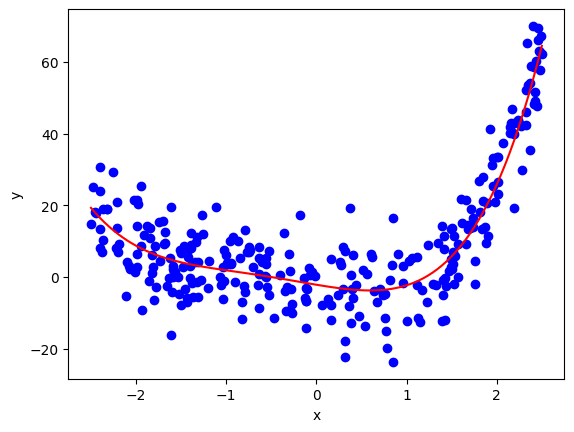

In [8]:
# Wielomianowa 2 stopnia
n = 4

poly_feature_4 = PolynomialFeatures(degree=n, include_bias=False)
X_poly_train = poly_feature_4.fit_transform(X_train)
X_poly_test = poly_feature_4.transform(X_test)
poly_4_reg = LinearRegression()
poly_4_reg.fit(X_poly_train, y_train)

y_pred_train = poly_4_reg.predict(X_poly_train)
y_pred_test = poly_4_reg.predict(X_poly_test)
train_mse_poly_4 = mean_squared_error(y_train, y_pred_train)
test_mse_poly_4 = mean_squared_error(y_test, y_pred_test)


print(f'intercept_: {poly_4_reg.intercept_}, coefficient_: {poly_4_reg.coef_}')
print(f'train_mse: {train_mse_poly_4}')
print(f'test_mse: {test_mse_poly_4}')

plt.clf()
plt.scatter(X, y, c="blue")
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_feature_4.transform(X_curve)
plt.plot(X_curve, poly_4_reg.predict(X_curve_poly), c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

intercept_: [-2.1164214], coefficient_: [[-6.45995892  0.90753823  3.64195451  0.99365618 -0.20654606]]
train_mse: 57.60234105469414
test_mse: 70.23040783797491


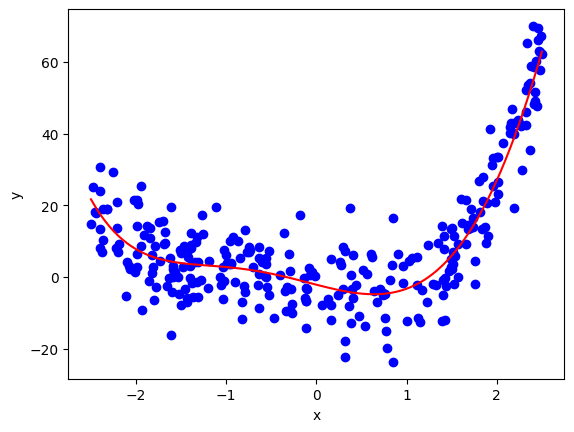

In [9]:
# Wielomianowa 2 stopnia
n = 5

poly_feature_5 = PolynomialFeatures(degree=n, include_bias=False)
X_poly_train = poly_feature_5.fit_transform(X_train)
X_poly_test = poly_feature_5.transform(X_test)
poly_5_reg = LinearRegression()
poly_5_reg.fit(X_poly_train, y_train)

y_pred_train = poly_5_reg.predict(X_poly_train)
y_pred_test = poly_5_reg.predict(X_poly_test)
train_mse_poly_5 = mean_squared_error(y_train, y_pred_train)
test_mse_poly_5 = mean_squared_error(y_test, y_pred_test)


print(f'intercept_: {poly_5_reg.intercept_}, coefficient_: {poly_5_reg.coef_}')
print(f'train_mse: {train_mse_poly_5}')
print(f'test_mse: {test_mse_poly_5}')

plt.clf()
plt.scatter(X, y, c="blue")
X_curve = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_curve_poly = poly_feature_5.transform(X_curve)
plt.plot(X_curve, poly_5_reg.predict(X_curve_poly), c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [10]:
mse_dict = {
    "lin_reg": [train_mse_lin_reg, test_mse_lin_reg],
    "knn_3_reg": [train_mse_knn_3, test_mse_knn_3],
    "knn_5_reg": [train_mse_knn_5, test_mse_knn_5],
    "poly_2_reg": [train_mse_poly_2, test_mse_poly_2],
    "poly_3_reg": [train_mse_poly_3, test_mse_poly_3],
    "poly_4_reg": [train_mse_poly_4, test_mse_poly_4],
    "poly_5_reg": [train_mse_poly_5, test_mse_poly_5]
}

mse_df = pd.DataFrame.from_dict(mse_dict, orient='index', columns = ['train_mse', 'test_mse'])

with open('mse.pkl', 'wb') as f:
    pickle.dump(mse_df, f)

mse_df

,train_mse,test_mse
lin_reg,267.360357,252.937866
knn_3_reg,41.014501,80.553202
knn_5_reg,48.780489,80.630114
poly_2_reg,99.071226,114.576748
poly_3_reg,68.324881,81.089466
poly_4_reg,58.257751,70.111419
poly_5_reg,57.602341,70.230408


In [11]:
list_of_models = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (poly_2_reg,
poly_feature_2), (poly_3_reg, poly_feature_3), (poly_4_reg, poly_feature_4),
(poly_5_reg, poly_feature_5)]

with open("reg.pkl", "wb") as f:
    pickle.dump(list_of_models, f)

list_of_models

[(LinearRegression(), None),
 (KNeighborsRegressor(n_neighbors=3), None),
 (KNeighborsRegressor(), None),
 (LinearRegression(), PolynomialFeatures(include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]